In [1]:
from model import ParticleClassifier
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix
import pandas as pd

/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/Users/shawn/miniconda3/envs/test/lib/python3.6/s

### Load data and model

In [2]:
classifier = ParticleClassifier()\
                .load_data('data/toy_data.csv')\
                .train_test_split()\
                .pre_proc_images(train=True, test=True)\
                .one_hot_encode_labels(train=True, test=True)\
                .load_model('model.h5')

Instructions for updating:
Colocations handled automatically by placer.
Data loaded into self.images, self.labels
Split into self.images_train, self.images_test, self.labels_train, self.labels_test
Train and test labels encoded into self.y_train and self.y_test
Instructions for updating:
Use tf.cast instead.


### Single pixel attack

Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 494 106]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.33      0.84      0.48       197
           2       0.32      0.15      0.21       222

    accuracy                           0.33       600
   macro avg       0.22      0.33      0.23       600
weighted avg       0.23      0.33      0.23       600



/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


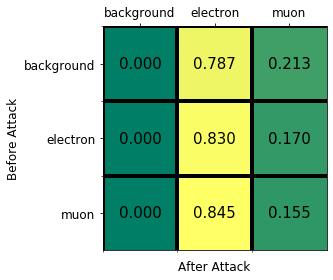

In [3]:
# Hot pixel attack
classifier.hot_pixel_attack()\
          .pre_proc_images(attacked=True)\
          .one_hot_encode_labels(attacked=True)\
          .evaluate_attack(file_name='img/single_pixel/hot_pixel_cm.pdf')

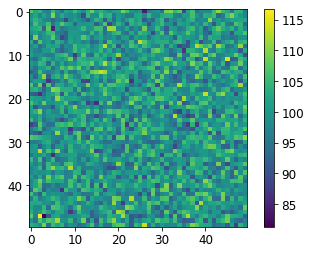

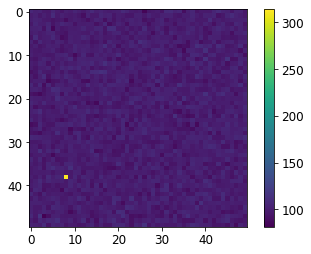

0, 1


In [4]:
classifier.show_misclassified_images([1], 'img/single_pixel/hot_pixel.pdf')

### Dead Channel Attack

Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [181 197 222]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       181
           1       1.00      1.00      1.00       197
           2       1.00      1.00      1.00       222

    accuracy                           1.00       600
   macro avg       1.00      1.00      1.00       600
weighted avg       1.00      1.00      1.00       600



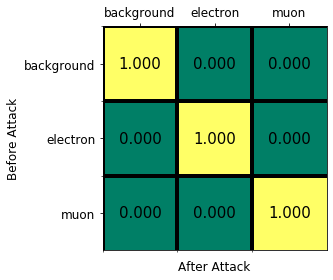

In [23]:
# Dead channel attack
classifier.hot_pixel_attack(value = classifier.images.min())\
          .pre_proc_images(attacked=True)\
          .one_hot_encode_labels(attacked=True)\
          .evaluate_attack(file_name='img/single_pixel/dead_pixel_cm.pdf')

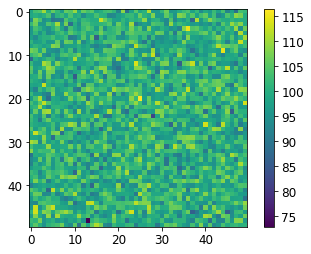

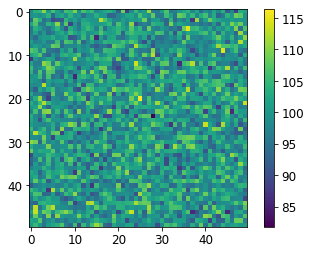

In [6]:
classifier.print_image(0, classifier.images_attacked, 'img/neutron/dead_pixel_attacked.pdf')
classifier.print_image(0, classifier.images_test, 'img/neutron/dead_pixel_orig.pdf')

### Background Neutron 

Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 175 425]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.94      0.84      0.89       197
           2       0.52      0.99      0.68       222

    accuracy                           0.64       600
   macro avg       0.49      0.61      0.52       600
weighted avg       0.50      0.64      0.54       600



/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


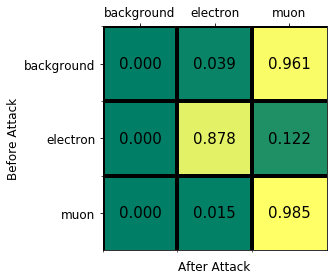

In [7]:
# Random neutron (2,2) attack
value =  np.mean([classifier.images.max(), classifier.images.mean()])
classifier = classifier.apply_attack(classifier.add_hot_area, size=(2,2), value=value)\
                       .pre_proc_images(attacked=True, filters=False)\
                       .one_hot_encode_labels(attacked=True)\
                       .evaluate_attack(file_name='img/neutron/neutron_cm.pdf')

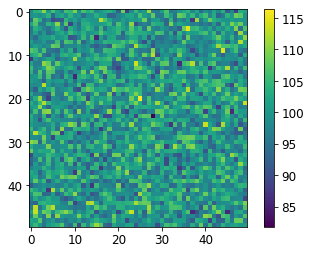

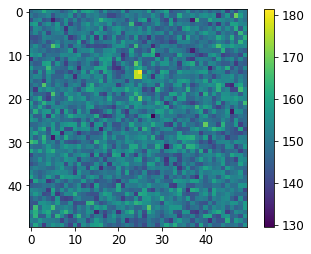

0, 2


In [10]:
classifier.show_misclassified_images([0], 'img/neutron/bg_m.pdf')

### Crack in the Detector

In [11]:
# Find pos to add crack
def crack_pos(size, images_orig):
    images = images_orig.copy()
    images = images.reshape(len(images), 2500)
    argmax = np.argmax(images, 1)
    pos = [list(np.unravel_index(i, (50,50))) for i in argmax]
    for xy in pos:
        if 50-xy[0] <= size[0]:
            xy[0] -= size[0]
        if 50-xy[1] <= size[1]:
            xy[1] -= size[1]
    return np.array(pos)

Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 487 113]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.40      1.00      0.58       197
           2       0.88      0.45      0.59       222

    accuracy                           0.49       600
   macro avg       0.43      0.48      0.39       600
weighted avg       0.46      0.49      0.41       600



/Users/shawn/miniconda3/envs/test/lib/python3.6/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


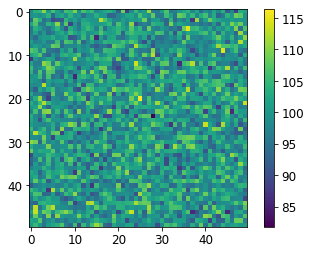

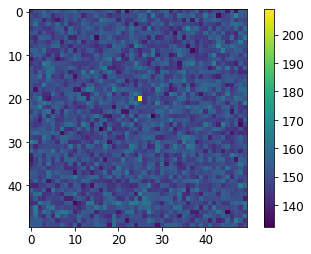

0, 1
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 353 247]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.56      1.00      0.72       197
           2       0.55      0.62      0.58       222

    accuracy                           0.56       600
   macro avg       0.37      0.54      0.43       600
weighted avg       0.39      0.56      0.45       600



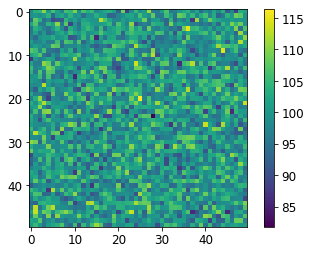

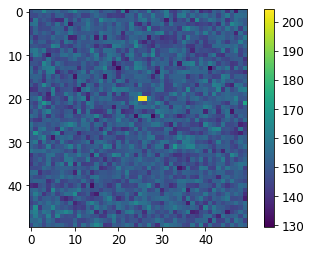

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 314 286]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.63      1.00      0.77       197
           2       0.55      0.71      0.62       222

    accuracy                           0.59       600
   macro avg       0.39      0.57      0.46       600
weighted avg       0.41      0.59      0.48       600



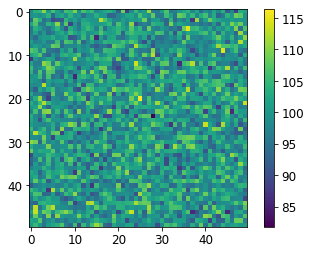

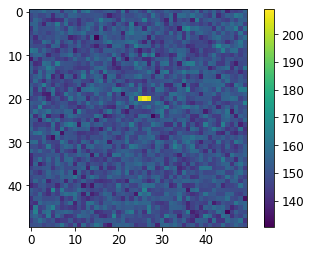

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 280 320]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.65      0.92      0.76       197
           2       0.52      0.75      0.61       222

    accuracy                           0.58       600
   macro avg       0.39      0.56      0.46       600
weighted avg       0.40      0.58      0.48       600



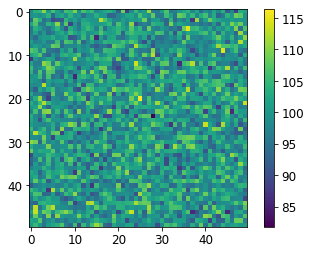

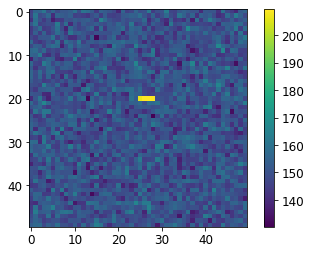

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 221 379]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.63      0.71      0.67       197
           2       0.47      0.80      0.59       222

    accuracy                           0.53       600
   macro avg       0.37      0.50      0.42       600
weighted avg       0.38      0.53      0.44       600



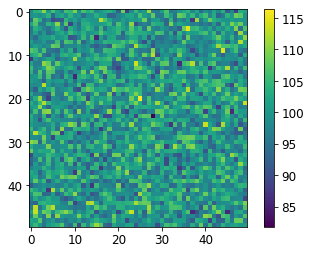

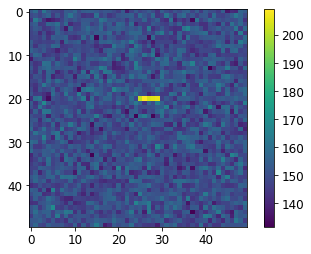

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 164 436]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.60      0.50      0.54       197
           2       0.43      0.84      0.57       222

    accuracy                           0.48       600
   macro avg       0.34      0.45      0.37       600
weighted avg       0.35      0.47      0.39       600



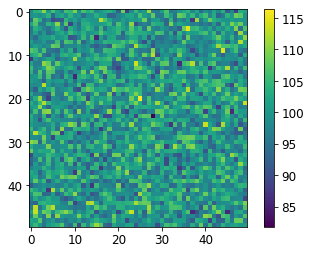

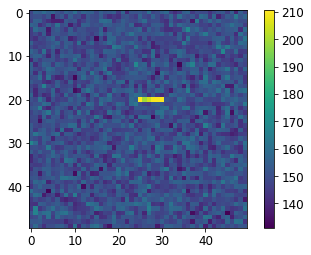

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 126 474]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.53      0.34      0.41       197
           2       0.40      0.86      0.55       222

    accuracy                           0.43       600
   macro avg       0.31      0.40      0.32       600
weighted avg       0.32      0.43      0.34       600



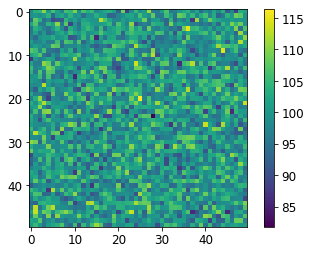

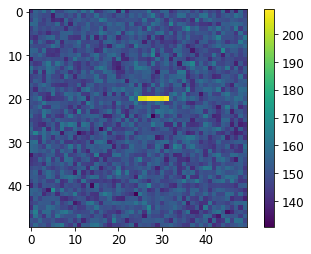

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0 110 490]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.50      0.28      0.36       197
           2       0.40      0.88      0.55       222

    accuracy                           0.42       600
   macro avg       0.30      0.39      0.30       600
weighted avg       0.31      0.42      0.32       600



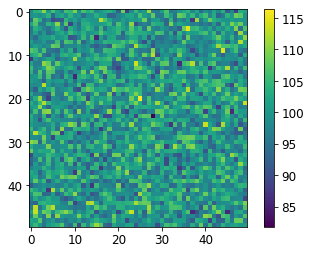

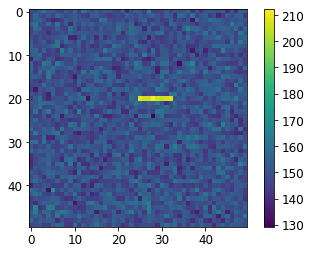

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  97 503]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.48      0.24      0.32       197
           2       0.39      0.88      0.54       222

    accuracy                           0.41       600
   macro avg       0.29      0.37      0.29       600
weighted avg       0.30      0.41      0.31       600



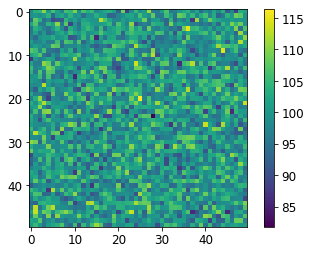

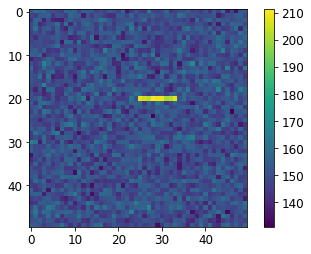

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  90 510]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.46      0.21      0.29       197
           2       0.39      0.89      0.54       222

    accuracy                           0.40       600
   macro avg       0.28      0.37      0.28       600
weighted avg       0.29      0.40      0.29       600



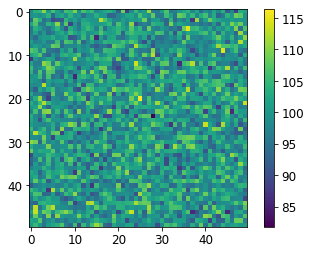

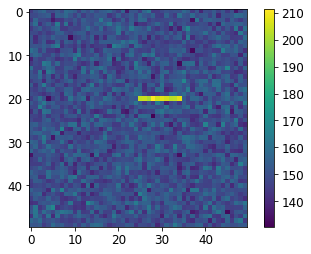

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  85 515]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.44      0.19      0.26       197
           2       0.38      0.89      0.54       222

    accuracy                           0.39       600
   macro avg       0.27      0.36      0.27       600
weighted avg       0.29      0.39      0.28       600



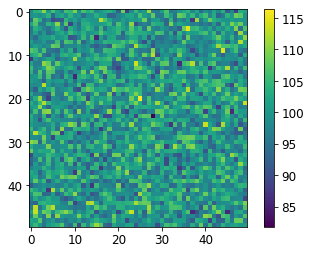

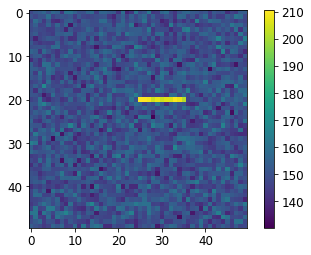

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  82 518]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.41      0.17      0.24       197
           2       0.38      0.89      0.54       222

    accuracy                           0.39       600
   macro avg       0.27      0.35      0.26       600
weighted avg       0.28      0.39      0.28       600



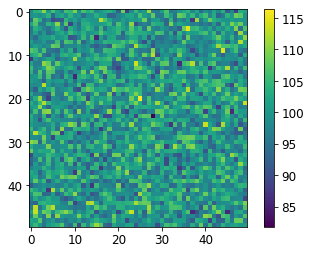

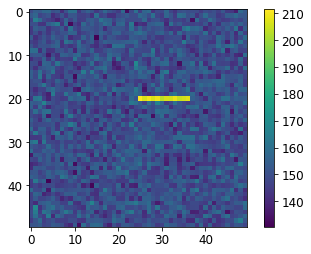

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  82 518]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.41      0.17      0.24       197
           2       0.38      0.89      0.54       222

    accuracy                           0.39       600
   macro avg       0.27      0.35      0.26       600
weighted avg       0.28      0.39      0.28       600



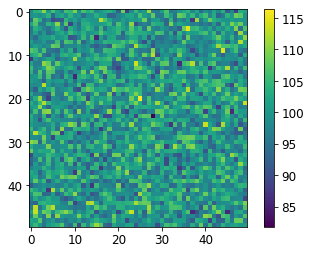

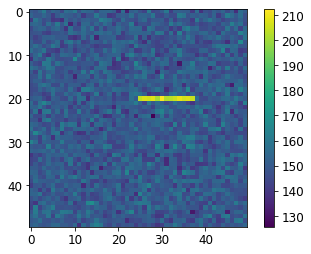

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  80 520]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.40      0.16      0.23       197
           2       0.38      0.89      0.53       222

    accuracy                           0.38       600
   macro avg       0.26      0.35      0.25       600
weighted avg       0.27      0.38      0.27       600



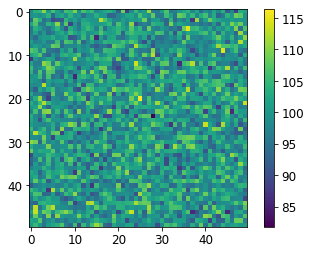

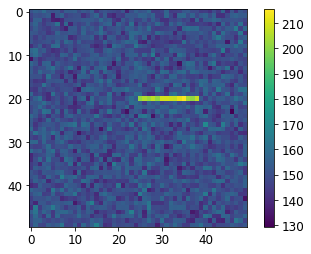

0, 2
Train and test labels encoded into self.y_train and self.y_test
Labels: [190 192 218] 
 Original Predictions: [181 197 222] 
 Attacked Predictions: [  0  79 521]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       181
           1       0.39      0.16      0.22       197
           2       0.38      0.89      0.53       222

    accuracy                           0.38       600
   macro avg       0.26      0.35      0.25       600
weighted avg       0.27      0.38      0.27       600



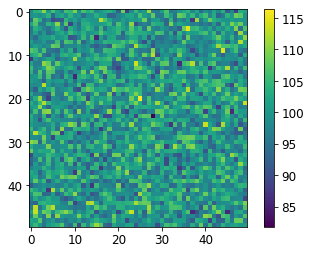

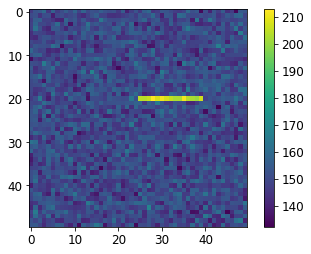

0, 2


In [20]:
crack_results = []
for n in range(1, 16):
    size = (1, n)
    pos = crack_pos(size, classifier.images_test)
    classifier.apply_attack(classifier.add_hot_area, size=size, pos=pos)\
              .pre_proc_images(attacked=True, filters=False)\
              .one_hot_encode_labels(attacked=True)\
              .evaluate_attack(confusion_matrix=False)
    classifier.show_misclassified_images([0])
    df = pd.DataFrame(classifier.report_dict).reset_index()
    df['n'] = n
    crack_results.append(df)
crack_results = pd.concat(crack_results)

In [13]:
def plot_results(df, index):
    results = crack_results[crack_results['index']==index]
    fig, ax = plt.subplots()
    for y, label in enumerate(['background', 'electron', 'muoun']):
        ax.plot(results['n'], results[str(y)], '--x', label=label)
        ax.set_xlabel('n')
        ax.set_ylabel(index)
    ax.legend()
    fig.savefig('img/crack/crack_{}.pdf'.format(index), bbox_inches='tight')

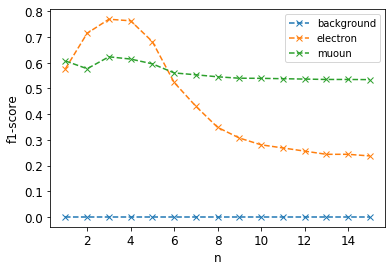

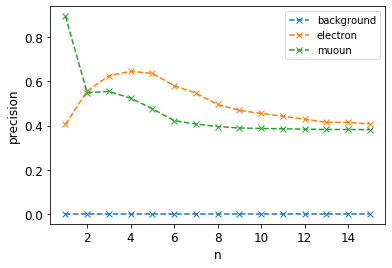

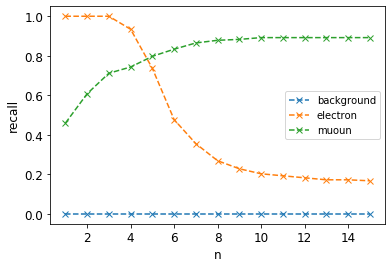

In [14]:
for metric in ['f1-score', 'precision', 'recall']:
    plot_results(crack_results, metric)

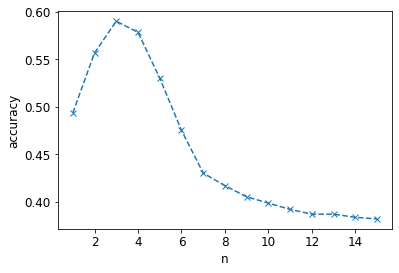

In [21]:
#Plot accuracy
fig, ax = plt.subplots()
acc = crack_results[['accuracy', 'n']].drop_duplicates()
ax.plot(acc['n'], acc['accuracy'], 'x--')
ax.set_xlabel('n')
ax.set_ylabel('accuracy')
plt.savefig('img/crack/crack_accuracy.pdf')

In [19]:
crack_results

,index,0,1,2,accuracy,macro avg,weighted avg,n
0,f1-score,0.0,0.576867,0.607143,0.498333,0.394670,0.414047,1
1,precision,0.0,0.405350,0.894737,0.498333,0.433362,0.464142,1
2,recall,0.0,1.000000,0.459459,0.498333,0.486486,0.498333,1
3,support,181.0,197.000000,222.000000,0.498333,600.000000,600.000000,1
0,f1-score,0.0,0.715064,0.576923,0.553333,0.430662,0.448241,2
1,precision,0.0,0.556497,0.548780,0.553333,0.368426,0.385765,2
2,recall,0.0,1.000000,0.608108,0.553333,0.536036,0.553333,2
3,support,181.0,197.000000,222.000000,0.553333,600.000000,600.000000,2
0,f1-score,0.0,0.769531,0.623274,0.591667,0.464268,0.483274,3
1,precision,0.0,0.625397,0.554386,0.591667,0.393261,0.410461,3


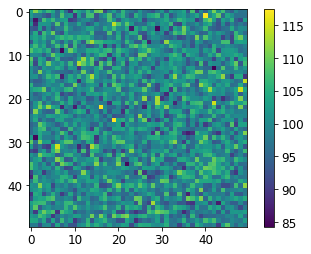

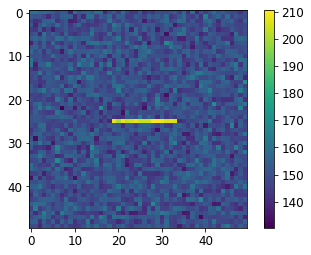

0, 2


In [22]:
classifier.show_misclassified_images([2], file_name='img/crack/crack_15.pdf')